# CAPM - Capital Asset Pricing Model 

In this project, we are building a CAPM model for Apple using linear regression and further explaining what a market market portfolio represents.
____

$r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Where:

   -
   
   -
   
   -

##### Market Weights:

$ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


In [1]:
Where:
    
    -
    
    -
    
    -

SyntaxError: invalid syntax (<ipython-input-1-76ea969be305>, line 1)

##### CAPM of a portfolio:

$ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [ ]:
Where:
    
    -
    
    -
    
    -

____
## Imports

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import pandas_datareader as web

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

____
## API Selection

- The API we've chosen for the assignment one was was provided by Yahoo https://www.yahoofinanceapi.com

- API's are freely available but be cautious with yahoo as at times it can be deprecated.

____
## Get the Data

#### Collecting Raw Data:

- The below code uses Yahoo Finances API to get The SPDR S&P 500 trust (SPY ETF is an exchange-traded fund which trades on the NYSE Arca under the symbol. It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.

- Further retrieve labeled financial data for Apple Inc using Yahoo Finances API.

- I've set each Apple and the SPDR S&P 500 to be a separate dataframe, with the variable being the aapl and spy_etf


The below code uses the API to retrieve the stocks data of the following companies between Jan 4th 2010 to July 18th 2017.

* Apple
* SPY ETF

____
## Data

Collecting Raw Data:

The below code uses the API to retrieve the stocks data of the following companies between Jan 4th 2010 to July 18th 2017.

* Apple
* SPY ETF

In [4]:
# Time variable to get the Raw data from the API 
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [5]:
spy_etf = web.DataReader('SPY','yahoo',start,end)
aapl = web.DataReader('aapl','yahoo',start,end)

In [6]:
# preview of the SPY ETF dataset (First Five Records)
spy_etf.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-04  113.389999  111.510002  112.370003  113.330002  118944600.0   
2010-01-05  113.680000  112.849998  113.260002  113.629997  111579900.0   
2010-01-06  113.989998  113.430000  113.519997  113.709999  116074400.0   
2010-01-07  114.330002  113.180000  113.500000  114.190002  131091100.0   
2010-01-08  114.620003  113.660004  113.889999  114.570000  126402800.0   

            Adj Close  
Date                   
2010-01-04  90.205025  
2010-01-05  90.443817  
2010-01-06  90.507492  
2010-01-07  90.889519  
2010-01-08  91.191971

In [7]:
# preview of the Apple dataset (First Five Records)
aapl.head()

High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.562589
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.573936
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.469367
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.457409
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.500340

#### Data check

- Looking for missing data to see if processing is needed.
- Checking if any of the numeric data is a string.

In [8]:
#Calculates the sum of all the null values in all the fields(columns)
aapl.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
#Further check if any of the numeric data is not string
aapl.dtypes.value_counts()

float64    6
dtype: int64

In [10]:
#Calculates the sum of all the null values in all the fields(columns)
spy_etf.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
#Further check if any of the numeric data is not string
spy_etf.dtypes.value_counts()

float64    6
dtype: int64

#### Pre-Processing Completed

- We can see that there is no Null value in the data, and all stock values are not strings.

- This means there are no values in the dataset such as "Not Available" or "NA", etc.

- Both of these are highly indicative that all values are present.

## Explorative Data Analysis

In the following, we will be focusing on the closing price to understand the exact cash positions of the stocks end of day.

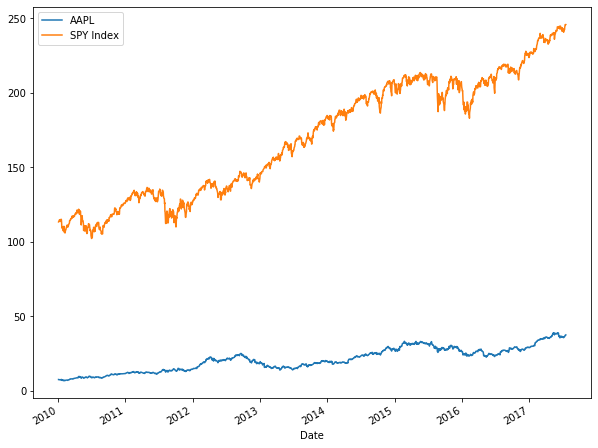

In [32]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

#### Interpretation

- The market index value per share, being SPY_ETF exceeds the value of individual Apple stock within the given time period.

### Cumulative Returns

- The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one. Reinvesting the dividends or capital gains of an investment impacts its cumulative return.

In [13]:
# creates a new dataframe for appl and spy_etf by dividing the t+n Close price by t=0 Close price
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

In [14]:
# preview of the Apple cumulative dataset (First Five Records)
aapl['Cumulative'].head()

Date
2010-01-04    1.000000
2010-01-05    1.001729
2010-01-06    0.985795
2010-01-07    0.983973
2010-01-08    0.990514
Name: Cumulative, dtype: float64

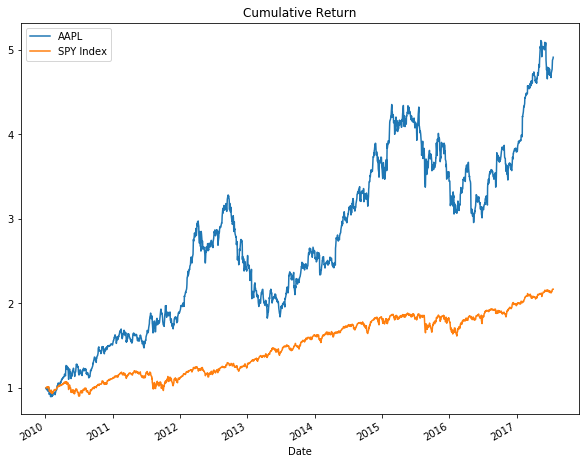

In [15]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return');

#### Daily Returns

Created a new empty DataFrame called returns. This dataframe contains the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We use pandas pct_change() method on the Close column to create a column representing this return value. First row will have null values due to the above formula.

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

In [17]:
aapl['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Daily Return, dtype: float64

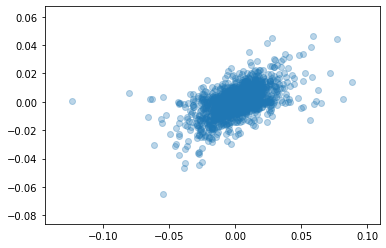

In [18]:
# assume daily returns are around-0.1 to 1
# put a x and y axis
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3);

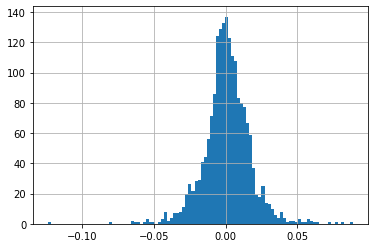

In [19]:
# put a x and y axis
aapl['Daily Return'].hist(bins=100);

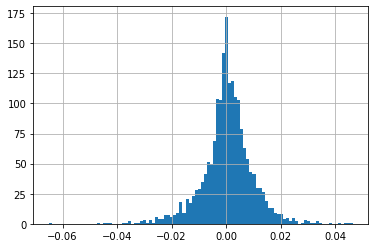

In [20]:
# put a x and y axis
spy_etf['Daily Return'].hist(bins=100);

### Interperation

- information

## CAPM model

In [21]:
# linear regression using Scikit
# iloc[:1] as loc[0] = n/a due to 
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [22]:
# have a formula here to explain
beta

0.3257185128942015

In [23]:
# have a formula here to explain
alpha

0.00013699311134533315

In [24]:
# explain the r value
r_value

0.5556582033773629

### Interperation

- information

## What if our stock was completely related to SP500?

The following is used to further explain what a asset that mimics the market looks like.

In [25]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [26]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [27]:
noise

array([-3.67231340e-04, -4.58565934e-04,  3.53033075e-04, ...,
        8.14296548e-05, -2.17223760e-03, -9.38046122e-04])

In [28]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2010-01-05    0.002280
2010-01-06    0.000245
2010-01-07    0.004574
2010-01-08    0.002532
2010-01-11    0.000695
                ...   
2017-07-12    0.008570
2017-07-13    0.002869
2017-07-14    0.004746
2017-07-17   -0.002294
2017-07-18   -0.000409
Name: Daily Return, Length: 1897, dtype: float64

In [29]:
# linear regression using Scikit
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [30]:
beta

0.9935880496615974

In [31]:
alpha

-1.1520166687807002e-05